![title](nag_logo.png)

# Exercises - Ordinary Differential Equations

The `ode.ivp_rkts_range` function uses a Runge-Kutta (R-K) method to solve a first order system of Ordinary Differential Equations (ODEs).  Use this function to solve the following system of four differential equations:

\begin{align}
y'_0 & = - y_3 - 2 \exp(-t) \\
y'_1 &= 2 \exp(-t) - y_0 \\
y'_2 &= - y'_0 - y_2 - y_0 \\
y'_3 &= y_0
\end{align}

with initial condition $y = (1,0,1,-2)$, and integrating from $t=0$ to $t=1$.

In addition to `ode.ivp_rkts_range` you will need to use the setup function `ode.ivp_rkts_setup`

Solve the system using several different tolerances by adjusting the `tol` parameter in `ode.ivp_rkts_setup`.  Solve the system using several different Runge-Kutta methods by changing the `method` parameter.

See how the results you obtain increase in accuracy as the tolerance gets smaller.  The analytical solution for $y_0$ is $\exp(-t) + \sin(t)$, so you can compare this with the result for $y_0$ obtained with `ode.ivp_rkts_range`.

Use `ode.ivp_rkts_diag` to return the total number of function evaluations made by the solver.  See how this varies for different Runge-Kutte methods.  Which method is most efficient?

Cost of the integration in evaluations of f with method = 1, tol = 0.1 is  52
Cost of the integration in evaluations of f with method = 1, tol = 1e-06 is  808
Cost of the integration in evaluations of f with method = 2, tol = 0.1 is   156
Cost of the integration in evaluations of f with method = 2, tol = 1e-06 is  233


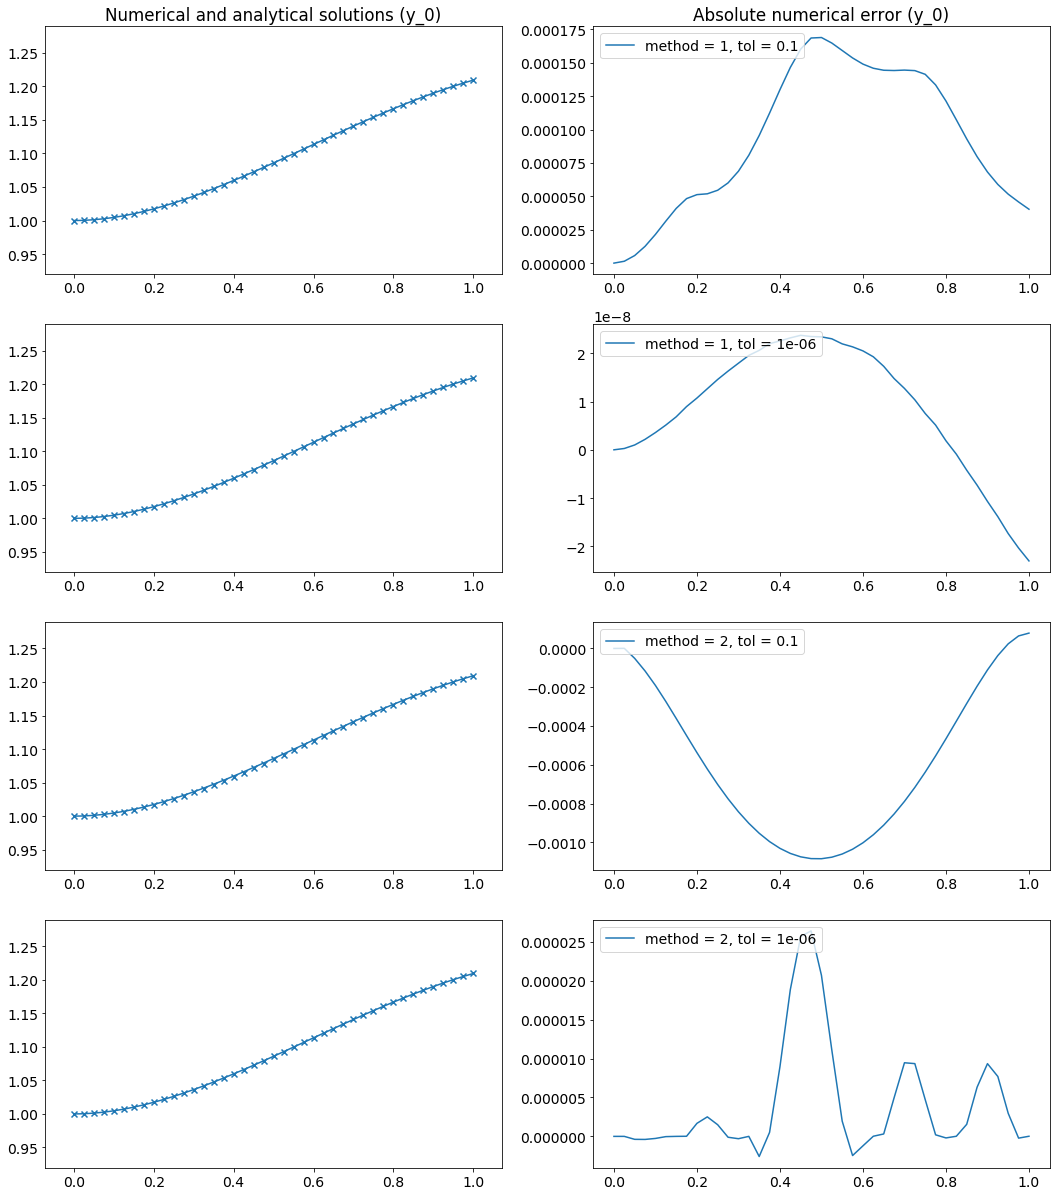

In [2]:
# import libraries
import numpy as np
from naginterfaces.library import ode
from matplotlib import pyplot as plt
import math

# Define RHS of ODE system
def f(t,y):  
    import math
    yp = np.empty(y.shape)
    yp[0] = -y[3] - 2.0 * math.exp(-t)
    yp[1] = 2.0 * math.exp(-t) - y[0]
    yp[2] = -yp[0] - y[2] - y[0]
    yp[3] = y[0]
    return yp

tstart = 0.0
tend = 1.0
yinit = [1.0, 0.0, 1.0, -2.0]

npts = 40
tinc = (tend-tstart)/npts

# Solve IVP for a given method and tolerance level
def solve_ivp(method, tol):
    ymax = np.empty(4)
    thresh = [tol,tol,tol,tol];
    
    # call setup function
    rk_comm = ode.ivp_rkts_setup(tstart, tend, yinit, tol, thresh, method)

    tseq = np.empty(npts+1); tseq[0] = tstart
    yseq = np.empty((npts+1,4)); yseq[0,:] = yinit

    t = tstart
    for j in range(npts):
        t = min(tend, t + tinc)
        # call solver
        (tseq[j+1], yseq[j+1,:], yp, ymax) = ode.ivp_rkts_range(f, t, yseq[j,:], ymax, rk_comm )
        
    (fevals, stepcost, waste, stepsok, hnext) = ode.ivp_rkts_diag(rk_comm)
    return (tseq, yseq, fevals)

# global option for font size
plt.rcParams.update({'font.size': 14})

# helper function for legend
def lab_str(m,t):
    return 'method = ' + str(m) + ', tol = ' + str(t)

m = 1; t = 1e-1
(tseq, yseq, fevals) = solve_ivp(method=m, tol=t)
plt.subplot(421)
plt.scatter(tseq, yseq[:,0],marker="x")
plt.plot(tseq, [math.exp(-t)  + math.sin(t) for t in tseq])
plt.title('Numerical and analytical solutions (y_0)')
plt.subplot(422)
plt.plot(tseq, yseq[:,0] - [math.exp(-t)  + math.sin(t) for t in tseq], label=lab_str(m,t))
plt.legend(loc='upper left')
plt.title('Absolute numerical error (y_0)')
print('Cost of the integration in evaluations of f with ' + lab_str(m,t) + ' is ', fevals)

m = 1; t = 1e-6
(tseq, yseq, fevals) = solve_ivp(method=m, tol=t)
plt.subplot(423)
plt.scatter(tseq, yseq[:,0],marker="x")
plt.plot(tseq, [math.exp(-t)  + math.sin(t) for t in tseq])
plt.subplot(424)
plt.plot(tseq, yseq[:,0] - [math.exp(-t)  + math.sin(t) for t in tseq], label=lab_str(m,t))
plt.legend(loc='upper left')
print('Cost of the integration in evaluations of f with ' + lab_str(m,t) + ' is ', fevals)

m = 2; t = 1e-1
(tseq, yseq, fevals) = solve_ivp(method=m, tol=t)
plt.subplot(425)
plt.scatter(tseq, yseq[:,0],marker="x")
plt.plot(tseq, [math.exp(-t)  + math.sin(t) for t in tseq])
plt.subplot(426)
plt.plot(tseq, yseq[:,0] - [math.exp(-t)  + math.sin(t) for t in tseq], label=lab_str(m,t))
plt.legend(loc='upper left')
print('Cost of the integration in evaluations of f with ' + lab_str(m,t) + ' is '.ljust(5), fevals)

m = 2; t = 1e-6
(tseq, yseq, fevals) = solve_ivp(method=m, tol=t)
plt.subplot(427)
plt.scatter(tseq, yseq[:,0],marker="x")
plt.plot(tseq, [math.exp(-t)  + math.sin(t) for t in tseq])
plt.subplot(428)
plt.plot(tseq, yseq[:,0] - [math.exp(-t)  + math.sin(t) for t in tseq], label=lab_str(m,t))
plt.legend(loc='upper left')
print('Cost of the integration in evaluations of f with ' + lab_str(m,t) + ' is ', fevals)

fig = plt.gcf()
fig.set_size_inches(18.0, 21.0)
plt.show()